In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Candy Valentina López Villanueva
*Métodos computacionales*

---

#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






In [2]:
import numpy as np
from scipy.integrate import quad, fixed_quad
import matplotlib.pyplot as plt

def trapezoidal_rule(f, a, b, n):
    """
    Calcula la integral definida de una función `f` en el intervalo [a, b]
    usando la regla del trapecio con `n` subintervalos.

    Parámetros:
    f : callable
        Función a integrar.
    a : float
        Límite inferior de integración.
    b : float
        Límite superior de integración.
    n : int
        Número de subintervalos.

    Retorna:
    float
        Aproximación de la integral definida usando la regla del trapecio.
    """
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])


def simpson_rule(f, a, b, n):
    """
    Calcula la integral definida de una función `f` en el intervalo [a, b]
    usando la regla de Simpson con `n` subintervalos (debe ser par).

    Parámetros:
    f : callable
        Función a integrar.
    a : float
        Límite inferior de integración.
    b : float
        Límite superior de integración.
    n : int
        Número de subintervalos (debe ser par).

    Retorna:
    float
        Aproximación de la integral definida usando la regla de Simpson.
    """
    if n % 2 == 1:
        raise ValueError("El número de subintervalos n debe ser par para Simpson.")

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (h / 3) * (y[0] + 2 * np.sum(y[2:n:2]) + 4 * np.sum(y[1:n:2]) + y[n])

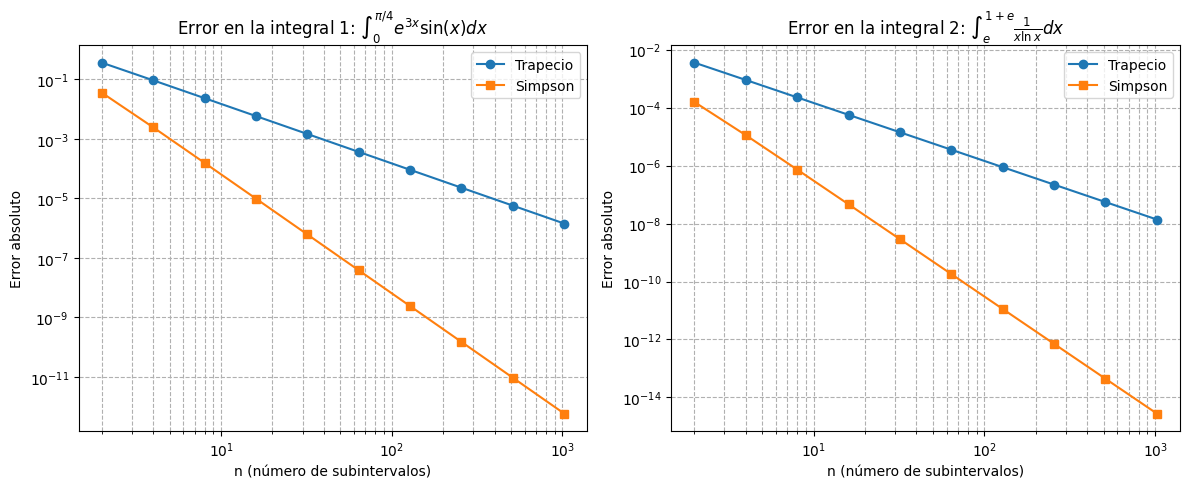

In [3]:
# Funciones a integrar
f1 = lambda x: np.exp(3 * x) * np.sin(x)
f2 = lambda x: 1 / (x * np.log(x))

# Límites de integración
a1, b1 = 0, np.pi / 4
a2, b2 = np.e, 1 + np.e

# Valor exacto con quad
I1_exact, _ = quad(f1, a1, b1)
I2_exact, _ = quad(f2, a2, b2)

# Rango de n para evaluar convergencia
ns = np.array([2**k for k in range(1, 11)])  # n = 2, 4, ..., 1024

# Inicializar errores
errors_trap_f1 = []
errors_simpson_f1 = []
errors_trap_f2 = []
errors_simpson_f2 = []

# Calcular errores para cada n
for n in ns:
    I1_trap = trapezoidal_rule(f1, a1, b1, n)
    I1_simp = simpson_rule(f1, a1, b1, n if n % 2 == 0 else n + 1)

    I2_trap = trapezoidal_rule(f2, a2, b2, n)
    I2_simp = simpson_rule(f2, a2, b2, n if n % 2 == 0 else n + 1)

    errors_trap_f1.append(abs(I1_trap - I1_exact))
    errors_simpson_f1.append(abs(I1_simp - I1_exact))

    errors_trap_f2.append(abs(I2_trap - I2_exact))
    errors_simpson_f2.append(abs(I2_simp - I2_exact))

# Graficar errores en escala log-log
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.loglog(ns, errors_trap_f1, 'o-', label='Trapecio')
plt.loglog(ns, errors_simpson_f1, 's-', label='Simpson')
plt.xlabel('n (número de subintervalos)')
plt.ylabel('Error absoluto')
plt.title('Error en la integral 1: $\\int_0^{\\pi/4} e^{3x}\\sin(x) dx$')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.subplot(1, 2, 2)
plt.loglog(ns, errors_trap_f2, 'o-', label='Trapecio')
plt.loglog(ns, errors_simpson_f2, 's-', label='Simpson')
plt.xlabel('n (número de subintervalos)')
plt.ylabel('Error absoluto')
plt.title('Error en la integral 2: $\\int_e^{1+e} \\frac{1}{x\\ln x} dx$')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

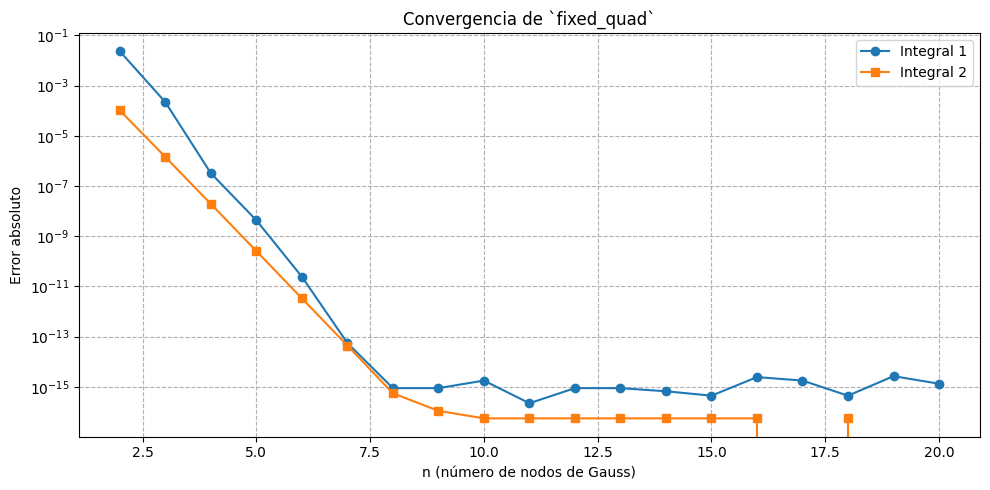

In [4]:
# Rango de nodos de Gauss para evaluar convergencia
ns_gauss = np.arange(2, 21)

# Inicializar errores
errors_fixed_f1 = []
errors_fixed_f2 = []

# Calcular errores para cada n
for n in ns_gauss:
    I1_fixed, _ = fixed_quad(f1, a1, b1, n=n)
    I2_fixed, _ = fixed_quad(f2, a2, b2, n=n)

    errors_fixed_f1.append(abs(I1_fixed - I1_exact))
    errors_fixed_f2.append(abs(I2_fixed - I2_exact))

# Graficar errores en escala log-log
plt.figure(figsize=(10, 5))

plt.plot(ns_gauss, errors_fixed_f1, 'o-', label='Integral 1')
plt.plot(ns_gauss, errors_fixed_f2, 's-', label='Integral 2')
plt.yscale('log')
plt.xlabel('n (número de nodos de Gauss)')
plt.ylabel('Error absoluto')
plt.title('Convergencia de `fixed_quad`')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()

#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [5]:
import numpy as np
from scipy.integrate import quad, tplquad

def integrand(z, y, x):
    """
    Función integrando para la integral triple:
    f(x, y, z) = (1/y) * sin(z/y)

    Parámetros:
    z : float
        Variable de integración más interna.
    y : float
        Variable de integración media.
    x : float
        Variable de integración más externa.

    Retorna:
    float
        Valor del integrando evaluado en (z, y, x).
    """
    return (1 / y) * np.sin(z / y)

def bounds_z(x, y):
    """
    Límite superior para z en función de x e y.

    Parámetros:
    x : float
        Variable externa.
    y : float
        Variable media.

    Retorna:
    float
        Límite superior para z.
    """
    return x * y

def calcular_con_tplquad():
    """
    Calcula la integral triple usando tplquad.

    Retorna:
    tuple
        Resultado de la integral y estimación del error.
    """
    resultado, error = tplquad(
        integrand,
        0, np.pi,                # x ∈ [0, π]
        lambda x: 0,             # y ∈ [0, x]
        lambda x: x,
        lambda x, y: 0,          # z ∈ [0, xy]
        bounds_z
    )
    return resultado, error

def inner_integral(y, x):
    """
    Integral interna respecto a z.

    Parámetros:
    y : float
        Variable media.
    x : float
        Variable externa.

    Retorna:
    float
        Resultado de la integral respecto a z.
    """
    integrand_z = lambda z: (1 / y) * np.sin(z / y)
    result, _ = quad(integrand_z, 0, x * y)
    return result

def middle_integral(x):
    """
    Integral media respecto a y.

    Parámetros:
    x : float
        Variable externa.

    Retorna:
    float
        Resultado de la integral respecto a y.
    """
    integrand_y = lambda y: inner_integral(y, x)
    result, _ = quad(integrand_y, 0, x)
    return result

def calcular_con_quad():
    """
    Calcula la integral triple usando quad anidado.

    Retorna:
    tuple
        Resultado de la integral y estimación del error.
    """
    resultado, error = quad(middle_integral, 0, np.pi)
    return resultado, error

# Ejecutar ambos métodos y comparar
resultado_tplquad, error_tplquad = calcular_con_tplquad()
resultado_quad, error_quad = calcular_con_quad()

# Mostrar resultados
print(f"Resultado usando tplquad     : {resultado_tplquad:.10f} ± {error_tplquad:.2e}")
print(f"Resultado usando quad anidado: {resultado_quad:.10f} ± {error_quad:.2e}")
print(f"Error absoluto entre métodos : {abs(resultado_tplquad - resultado_quad):.2e}")

Resultado usando tplquad     : 6.9348022005 ± 7.70e-14
Resultado usando quad anidado: 6.9348022005 ± 7.70e-14
Error absoluto entre métodos : 0.00e+00


#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [6]:
import numpy as np
from scipy.special import roots_legendre

def gauss_quad(func, a, b, n):
    """
    Calcula la integral de una función en el intervalo [a, b]
    utilizando cuadratura de Gauss-Legendre.

    Parámetros:
    - func: función a integrar. Debe aceptar un array de puntos.
    - a (float): límite inferior del intervalo.
    - b (float): límite superior del intervalo.
    - n (int): número de puntos de cuadratura (orden del polinomio de Legendre).

    Retorna:
    - float: aproximación de la integral en el intervalo [a, b].
    """
    x, w = roots_legendre(n)
    x_mapped = 0.5 * (b - a) * x + 0.5 * (a + b)   # cambio de variable
    w_mapped = 0.5 * (b - a) * w                   # ajuste de pesos
    return np.sum(w_mapped * func(x_mapped))


def integrand(z, y):
    """
    Función integrando de la integral triple.

    Parámetros:
    - z (float o np.ndarray): variable de integración más interna.
    - y (float): parámetro de la función, viene de la capa intermedia de integración.

    Retorna:
    - float o np.ndarray: valor de (1/y) * sin(z/y)
    """
    return (1 / y) * np.sin(z / y)


def integrar_z(y, x, n):
    """
    Realiza la integración en z del integrando (1/y) * sin(z/y),
    con límites desde 0 hasta xy.

    Parámetros:
    - y (float): valor actual de la variable y.
    - x (float): valor actual de la variable x.
    - n (int): número de puntos de cuadratura de Gauss.

    Retorna:
    - float: resultado de la integral respecto a z.
    """
    func_z = lambda z: integrand(z, y)
    return gauss_quad(func_z, 0, x * y, n)


def integrar_y(x, n):
    """
    Realiza la integración respecto a y, usando integración previa en z.

    Parámetros:
    - x (float): valor actual de la variable x.
    - n (int): número de puntos de cuadratura de Gauss.

    Retorna:
    - float: resultado de la integral doble respecto a y y z, para un x fijo.
    """
    # Vectorizamos integrar_z para aceptar arrays como entrada
    func_y = np.vectorize(lambda y: integrar_z(y, x, n))
    epsilon = 1e-8  # evitar división por cero en y=0
    return gauss_quad(func_y, epsilon, x, n)


def integral_triple_gauss(n):
    """
    Calcula la integral triple completa usando integración anidada
    con cuadratura de Gauss para cada variable.

    Parámetros:
    - n (int): número de puntos de cuadratura para todas las integraciones.

    Retorna:
    - float: resultado final de la integral triple.
    """
    func_x = np.vectorize(lambda x: integrar_y(x, n))
    return gauss_quad(func_x, 0, np.pi, n)

resultado = integral_triple_gauss(n=20)
print(f"Resultado de la integral triple con cuadratura de Gauss: {resultado:.10f}")

Resultado de la integral triple con cuadratura de Gauss: 6.9348021691


n= 2, Integral ≈ 7.1039317368, Error abs = 1.69e-01
n= 3, Integral ≈ 6.9281612835, Error abs = 6.64e-03
n= 4, Integral ≈ 6.9349123658, Error abs = 1.10e-04
n= 5, Integral ≈ 6.9348011609, Error abs = 1.04e-06
n= 6, Integral ≈ 6.9348021750, Error abs = 2.55e-08
n= 7, Integral ≈ 6.9348021691, Error abs = 3.14e-08
n= 8, Integral ≈ 6.9348021691, Error abs = 3.14e-08
n= 9, Integral ≈ 6.9348021691, Error abs = 3.14e-08
n=10, Integral ≈ 6.9348021691, Error abs = 3.14e-08
n=11, Integral ≈ 6.9348021691, Error abs = 3.14e-08
n=12, Integral ≈ 6.9348021691, Error abs = 3.14e-08
n=13, Integral ≈ 6.9348021691, Error abs = 3.14e-08
n=14, Integral ≈ 6.9348021691, Error abs = 3.14e-08
n=15, Integral ≈ 6.9348021691, Error abs = 3.14e-08
n=16, Integral ≈ 6.9348021691, Error abs = 3.14e-08
n=17, Integral ≈ 6.9348021691, Error abs = 3.14e-08
n=18, Integral ≈ 6.9348021691, Error abs = 3.14e-08
n=19, Integral ≈ 6.9348021691, Error abs = 3.14e-08
n=20, Integral ≈ 6.9348021691, Error abs = 3.14e-08


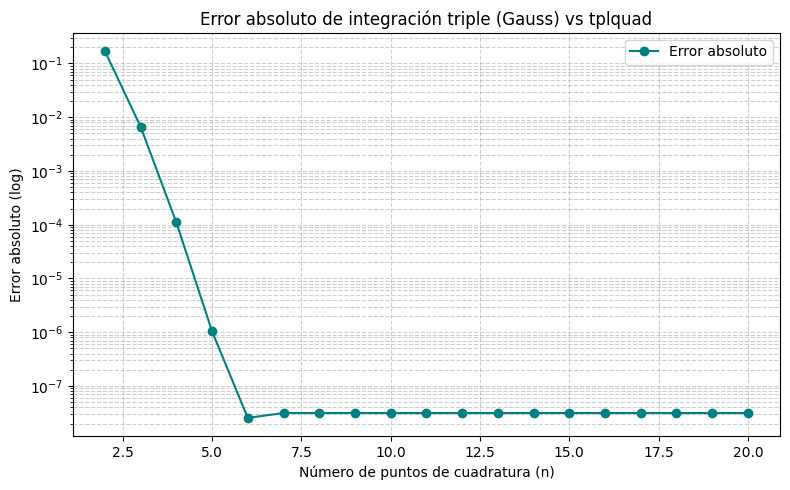

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import tplquad
from scipy.special import roots_legendre

def gauss_quad(func, a, b, n):
    """
    Calcula la integral de una función en el intervalo [a, b]
    utilizando cuadratura de Gauss-Legendre.

    Parámetros:
    - func: función a integrar. Debe aceptar un array de puntos.
    - a (float): límite inferior del intervalo.
    - b (float): límite superior del intervalo.
    - n (int): número de puntos de cuadratura (orden del polinomio de Legendre).

    Retorna:
    - float: aproximación de la integral en el intervalo [a, b].
    """
    x, w = roots_legendre(n)
    x_mapped = 0.5 * (b - a) * x + 0.5 * (a + b)   # cambio de variable
    w_mapped = 0.5 * (b - a) * w                   # ajuste de pesos
    return np.sum(w_mapped * func(x_mapped))


def integrand(z, y):
    """
    Función integrando de la integral triple.

    Parámetros:
    - z (float o np.ndarray): variable de integración más interna.
    - y (float): parámetro de la función, viene de la capa intermedia de integración.

    Retorna:
    - float o np.ndarray: valor de (1/y) * sin(z/y)
    """
    return (1 / y) * np.sin(z / y)


def integrar_z(y, x, n):
    """
    Realiza la integración en z del integrando (1/y) * sin(z/y),
    con límites desde 0 hasta xy.

    Parámetros:
    - y (float): valor actual de la variable y.
    - x (float): valor actual de la variable x.
    - n (int): número de puntos de cuadratura de Gauss.

    Retorna:
    - float: resultado de la integral respecto a z.
    """
    func_z = lambda z: integrand(z, y)
    return gauss_quad(func_z, 0, x * y, n)


def integrar_y(x, n):
    """
    Realiza la integración respecto a y, usando integración previa en z.

    Parámetros:
    - x (float): valor actual de la variable x.
    - n (int): número de puntos de cuadratura de Gauss.

    Retorna:
    - float: resultado de la integral doble respecto a y y z, para un x fijo.
    """
    # Vectorizamos integrar_z para aceptar arrays como entrada
    func_y = np.vectorize(lambda y: integrar_z(y, x, n))
    epsilon = 1e-8  # evitar división por cero en y=0
    return gauss_quad(func_y, epsilon, x, n)


def integral_triple_gauss(n):
    """
    Calcula la integral triple completa usando integración anidada
    con cuadratura de Gauss para cada variable.

    Parámetros:
    - n (int): número de puntos de cuadratura para todas las integraciones.

    Retorna:
    - float: resultado final de la integral triple.
    """
    func_x = np.vectorize(lambda x: integrar_y(x, n))
    return gauss_quad(func_x, 0, np.pi, n)

# Cálculo del valor exacto con tplquad
# Límite externo x: 0 a pi
# Límite intermedio y: 0 a x
# Límite interno z: 0 a x*y
exacto_tplquad, _ = tplquad(
    lambda z, y, x: (1 / y) * np.sin(z / y),
    0, np.pi,                          # x
    lambda x: 0, lambda x: x,         # y
    lambda x, y: 0, lambda x, y: x*y  # z
)

# Evaluar el error absoluto para distintos valores de n
n_values = range(2, 21)
errores = []

for n in n_values:
    approx = integral_triple_gauss(n)
    error_abs = abs(approx - exacto_tplquad)
    errores.append(error_abs)
    print(f"n={n:2d}, Integral ≈ {approx:.10f}, Error abs = {error_abs:.2e}")

# Graficar error absoluto en escala log-log
plt.figure(figsize=(8, 5))
plt.plot(n_values, errores, marker='o', linestyle='-', color='teal', label='Error absoluto')
plt.yscale('log')
plt.xlabel('Número de puntos de cuadratura (n)')
plt.ylabel('Error absoluto (log)')
plt.title('Error absoluto de integración triple (Gauss) vs tplquad')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [8]:
import numpy as np
from scipy.integrate import quad, fixed_quad
from scipy.special import roots_legendre

def gauss_quad(func, a, b, n):
    """
    Calcula la integral de una función en el intervalo [a, b]
    utilizando cuadratura de Gauss-Legendre.

    Parámetros:
    - func: función a integrar. Debe aceptar un array de puntos.
    - a (float): límite inferior del intervalo.
    - b (float): límite superior del intervalo.
    - n (int): número de puntos de cuadratura (orden del polinomio de Legendre).

    Retorna:
    - float: aproximación de la integral en el intervalo [a, b].
    """
    x, w = roots_legendre(n)
    x_mapped = 0.5 * (b - a) * x + 0.5 * (a + b)   # cambio de variable
    w_mapped = 0.5 * (b - a) * w                   # ajuste de pesos
    return np.sum(w_mapped * func(x_mapped))

def integrate_with_tolerance(func, a, b, method, tolerance=1e-5, max_n=20000):
    """
    Calcula la integral de una función usando un método dado,
    aumentando el número de subintervalos/puntos hasta que
    la diferencia entre dos aproximaciones consecutivas sea menor que la tolerancia.

    Parámetros:
    - func: La función a integrar.
    - a (float): Límite inferior de integración.
    - b (float): Límite superior de integración.
    - method (str): Método de integración ('trapezoidal', 'simpson', 'gauss').
    - tolerance (float): Tolerancia de error deseada.
    - max_n (int): Número máximo de subintervalos/puntos a intentar.

    Retorna:
    - tuple: (valor_aproximado, numero_de_subintervalos/puntos_usados)
    """
    n = 2  # Empezar con un número pequeño de subintervalos/puntos
    if method == 'simpson' and n % 2 != 0:
        n += 1

    integral_prev = 0.0
    integral_curr = 0.0

    for _ in range(int(np.log2(max_n)) + 1): # Bucle para duplicar n
        if method == 'trapezoidal':
            integral_curr = trapezoidal_rule(func, a, b, n)
        elif method == 'simpson':
             if n % 2 != 0: n += 1 # Asegurar n par para Simpson
             integral_curr = simpson_rule(func, a, b, n)
        elif method == 'gauss':
             # Para Gauss, 'n' es el número de puntos, no subintervalos.
             # Aumentamos 'n' linealmente en este contexto para simpleza,
             # aunque la convergencia es mucho más rápida.
             integral_curr = gauss_quad(func, a, b, n)
        else:
            raise ValueError("Método de integración no reconocido.")

        if abs(integral_curr - integral_prev) < tolerance and n > 2:
            return integral_curr, n

        integral_prev = integral_curr
        if method in ['trapezoidal', 'simpson']:
            n *= 2  # Duplicar subintervalos para Trapecio y Simpson
        elif method == 'gauss':
             n += 2 # Aumentar puntos para Gauss (ajustar según necesidad)

        if n > max_n and method in ['trapezoidal', 'simpson']:
             print(f"Advertencia: Tolerancia no alcanzada después de {max_n} subintervalos con método {method}")
             return integral_curr, n # Retornar el último resultado si se supera max_n
        if n > 500 and method == 'gauss': # Límite razonable para puntos de Gauss
             print(f"Advertencia: Tolerancia no alcanzada después de 500 puntos de Gauss.")
             return integral_curr, n


    return integral_curr, n # Retornar el último resultado si el bucle termina

# Integral 1:  int_0^(pi/2) (1/sqrt(tan x)) dx
print("Calculando integral 1: int_0^(pi/2) (1/sqrt(tan x)) dx")
func1 = lambda x: 1 / np.sqrt(np.tan(x))
a1, b1 = 0 + 1e-9, np.pi / 2 - 1e-9 # Evitar singularidades en los límites

integral1_trap, n1_trap = integrate_with_tolerance(func1, a1, b1, 'trapezoidal')
print(f"  Trapezoidal: {integral1_trap:.10f} (n={n1_trap})")

integral1_simpson, n1_simpson = integrate_with_tolerance(func1, a1, b1, 'simpson')
print(f"  Simpson    : {integral1_simpson:.10f} (n={n1_simpson})")

integral1_gauss, n1_gauss = integrate_with_tolerance(func1, a1, b1, 'gauss')
print(f"  Gauss      : {integral1_gauss:.10f} (n={n1_gauss} puntos)")


# Integral 2: int_1^infty (cos x / x^3) dx
print("\nCalculando integral 2: int_1^infty (cos x / x^3) dx")
func2 = lambda x: np.cos(x) / (x**3)

# Para integrar hasta el infinito, podemos truncar la integral en un valor lo suficientemente grande
# donde la contribución de la función sea despreciable, o usar un cambio de variable.
# En este caso, truncaremos por simplicidad.
b2 = 100 # Límite superior truncado (ajustar según necesidad para la tolerancia)

integral2_trap, n2_trap = integrate_with_tolerance(func2, 1, b2, 'trapezoidal')
print(f"  Trapezoidal: {integral2_trap:.10f} (n={n2_trap})")

integral2_simpson, n2_simpson = integrate_with_tolerance(func2, 1, b2, 'simpson')
print(f"  Simpson    : {integral2_simpson:.10f} (n={n2_simpson})")

integral2_gauss, n2_gauss = integrate_with_tolerance(func2, 1, b2, 'gauss')
print(f"  Gauss      : {integral2_gauss:.10f} (n={n2_gauss} puntos)")


# Integral 3: int_0^(pi/4) int_0^(sin x) (1/sqrt(1-y^2)) dy dx
print("\nCalculando integral 3: int_0^(pi/4) int_0^(sin x) (1/sqrt(1-y^2)) dy dx")

# La integral interna es int_0^(sin x) (1/sqrt(1-y^2)) dy, que es arcsin(y) evaluado de 0 a sin(x).
# arcsin(sin(x)) para x in [0, pi/4] es simplemente x.
# Así, la integral doble se reduce a int_0^(pi/4) x dx

func3_reduced = lambda x: x
a3, b3 = 0, np.pi / 4

integral3_trap, n3_trap = integrate_with_tolerance(func3_reduced, a3, b3, 'trapezoidal')
print(f"  Trapezoidal: {integral3_trap:.10f} (n={n3_trap})")

integral3_simpson, n3_simpson = integrate_with_tolerance(func3_reduced, a3, b3, 'simpson')
print(f"  Simpson    : {integral3_simpson:.10f} (n={n3_simpson})")

integral3_gauss, n3_gauss = integrate_with_tolerance(func3_reduced, a3, b3, 'gauss')
print(f"  Gauss      : {integral3_gauss:.10f} (n={n3_gauss} puntos)")

Calculando integral 1: int_0^(pi/2) (1/sqrt(tan x)) dx
Advertencia: Tolerancia no alcanzada después de 20000 subintervalos con método trapezoidal
  Trapezoidal: 3.7230399223 (n=32768)
Advertencia: Tolerancia no alcanzada después de 20000 subintervalos con método simpson
  Simpson    : 3.2197150308 (n=32768)
  Gauss      : 2.1856692780 (n=32 puntos)

Calculando integral 2: int_1^infty (cos x / x^3) dx
Advertencia: Tolerancia no alcanzada después de 20000 subintervalos con método trapezoidal
  Trapezoidal: 0.0181245824 (n=32768)
  Simpson    : 0.0181171982 (n=4096)
  Gauss      : 0.0175501905 (n=32 puntos)

Calculando integral 3: int_0^(pi/4) int_0^(sin x) (1/sqrt(1-y^2)) dy dx
  Trapezoidal: 0.3084251375 (n=4)
  Simpson    : 0.3084251375 (n=4)
  Gauss      : 0.3084251375 (n=4 puntos)
